In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

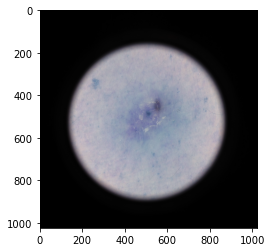

In [3]:
#read the image
read_img=cv2.imread("FN.jpg")
plt.imshow(read_img)

In [4]:
flags=[i for i in dir(cv2) if i.startswith("COLOR_")]

In [13]:
#change to hsv
hsv = cv2.cvtColor(read_img, cv2.COLOR_BGR2HSV)


In [14]:
# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(read_img,read_img, mask= mask)

cv2.imwrite('res.png',res)




True

In [72]:
#thresholding ,contour,bounding box
read_img=cv2.imread("TN.jpg",0)
read_img_or=cv2.imread("TN.jpg")
radius1=0
list_x=[]
list_y=[]
#different thresholdinng technique
ret,thresh = cv2.threshold(read_img,2,255,cv2.THRESH_BINARY)
# ret,thresh2 = cv2.threshold(read_img,2,255,cv2.THRESH_BINARY_INV)
# ret,thresh3 = cv2.threshold(read_img,2,255,cv2.THRESH_TRUNC)
# ret,thresh4 = cv2.threshold(read_img,2,255,cv2.THRESH_TOZERO)
# ret,thresh5 = cv2.threshold(read_img,2,255,cv2.THRESH_TOZERO_INV)
#find the contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# cnt=contours[0]
# for i in contours:
# #     print (i[0][0])
#     list_x.append(i[0][0][0])
#     list_x.append(i[0][0][1])

# contours = contours[0] if len(contours) == 2 else contours[1]

#define bounding box(rectangle) and circle so that image can be crooped from the bounding box defined.
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    x=x
    y=y
    h=h-10
    w=w-10
    cv2.rectangle(read_img_or, (x, y), (x+w, y+h), (0, 255, 0), 2)
    print("x,y,w,h:",x,y,w,h)

    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)

    # draw a rectangle from the defined bounding box
    cv2.drawContours(read_img_or, [box], 0, (0, 0, 255))
    cv2.imwrite('result.jpg',read_img_or)     
    

    # finally, get the min enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    center = (int(x), int(y))
    radius = int(radius)
    #find out the maximum radius from all the detected enclsoing circles
    if radius>radius1:
        radius1=radius
        center_min=center
     
    print(center_min,radius1)
    r=radius1-100
    x=center_min[0]
    y=center_min[1]
    result = read_img_or[x-r:x+r,y-r:y+r]
    cv2.imwrite("result2.png",result)
    
#     and draw the circle in blue
#     img = cv2.circle(read_img_or, center, radius, (255, 0, 0), 2)

    # print(len(contours))
    # cv2.drawContours(read_img_or, contours, -1, (255, 255, 0), 1)

    # cv2.imwrite("contours.png", read_img_or)





In [9]:
read_img=cv2.imread("FN.jpg")
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(read_img,kernel,iterations = 1)
cv2.imwrite("dilation.png",dilation)


True

In [81]:
blur = cv2.bilateralFilter(read_img,9,75,75)
cv2.imwrite("blur.png",blur)


True

In [ ]:

normalizedImg = np.zeros((read_img.shape[0], read_img.shape[1]))
normalizedImg = cv2.normalize(read_img,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("dddds.png",normalizedImg)


In [6]:
read_img=cv2.imread("FN.jpg",0)
dst = cv2.equalizeHist(read_img)
cv2.imwrite("ddddsaaa.png",dst)



True

In [28]:
img=cv2.imread("HN.jpg")

gray =cv2.imread("HN.jpg",0)

# threshold input image using otsu thresholding as mask and refine with morphology
ret, mask = cv2.threshold(gray,0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# put mask into alpha channel of image
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask
# save resulting masked image
cv2.imwrite('result_mor.png', result)



True